In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [2]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time
!ls

 99% 2.28G/2.29G [00:17<00:00, 48.7MB/s]
100% 2.29G/2.29G [00:17<00:00, 144MB/s] 
artists.csv  best-artworks-of-all-time.zip  images  kaggle.json  resized


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized/resized/Henri_Rousseau_61.jpg  
  inflating: resized/resized/Henri_Rousseau_62.jpg  
  inflating: resized/resized/Henri_Rousseau_63.jpg  
  inflating: resized/resized/Henri_Rousseau_64.jpg  
  inflating: resized/resized/Henri_Rousseau_65.jpg  
  inflating: resized/resized/Henri_Rousseau_66.jpg  
  inflating: resized/resized/Henri_Rousseau_67.jpg  
  inflating: resized/resized/Henri_Rousseau_68.jpg  
  inflating: resized/resized/Henri_Rousseau_69.jpg  
  inflating: resized/resized/Henri_Rousseau_7.jpg  
  inflating: resized/resized/Henri_Rousseau_70.jpg  
  inflating: resized/resized/Henri_Rousseau_8.jpg  
  inflating: resized/resized/Henri_Rousseau_9.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_1.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_10.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_11.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_12.jpg  
  inflat

In [3]:
print(os.listdir())

['kaggle.json', 'images', 'resized', 'artists.csv']


In [4]:
import pandas as pd
import numpy as np
artists = pd.read_csv('artists.csv')

In [5]:
#checking shape of artists to verify data looks correct
artists.shape

(50, 8)

In [6]:
display(artists)

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


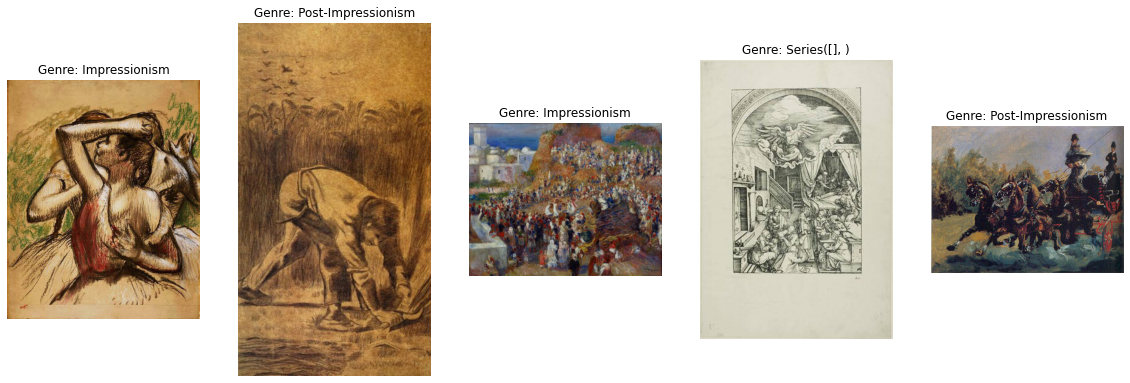

In [7]:
images_directory = 'resized/resized'

import matplotlib.pyplot as plt
import random
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

# Here I am determining how to find the genre of each image, this is done by using the images name which contains the artist's name. Using the artist's name I 
# can then get the associated genre using the .csv file.
for i in range(n):
    random_image = random.choice(os.listdir(images_directory))
    random_image_file = os.path.join(images_directory, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    # addding spaces to artists name and getting rid of the .jpg
    artist_name = random_image.replace('_', ' ').replace('.jpg','')
    # getting rid of the digits for the picture from the artists name
    artist_name = ''.join(i for i in artist_name if not i.isdigit())
    # getting rid of space at the end of artists name
    artist_name = artist_name.strip()
    artist_row = artists.loc[artists['name'] == artist_name]
    # artist row contains the entire row for that artist so I'm just selecting the genre then removing unneccesary data to leave just the genre name
    artist_genre = str(artist_row['genre']).replace('Name: genre, dtype: object', '')
    artist_genre = ''.join(i for i in artist_genre if not i.isdigit())
    artist_genre = artist_genre.strip()
    axes[i].set_title("Genre: " + artist_genre)
    axes[i].axis('off')

plt.show()

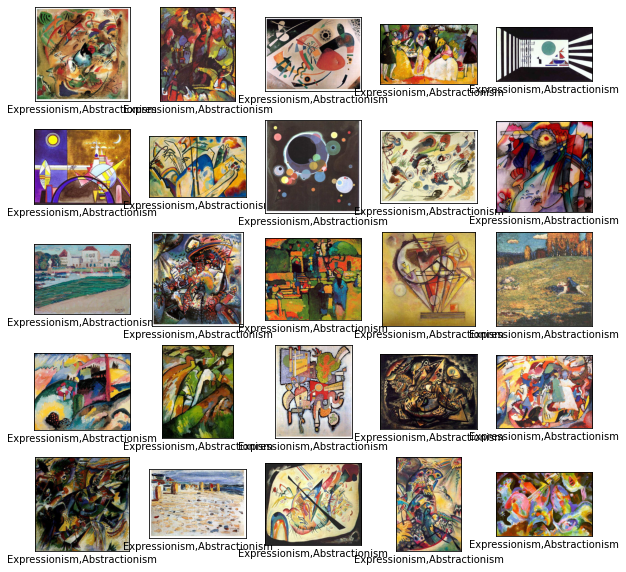

In [10]:
# Taking all images from the resized folder and putting them into a list, then also creating a list for the associated labels(genre)
from PIL import Image
import glob
import tensorflow as tf
image_list = []
image_labels = []

for filename in glob.glob(r'/content/gdrive/My Drive/Kaggle/resized/resized/*.jpg'): 
    im=Image.open(filename)
    # converting image to nparray and normalizing pixel values
    image_list.append(im)
    painter = filename.replace('/content/gdrive/My Drive/Kaggle/resized/resized/', '')
    painter = painter.replace('_', ' ').replace('.jpg','')
    painter = ''.join(i for i in painter if not i.isdigit())
    painter = painter.strip()
    painter_row = artists.loc[artists['name'] == painter]
    painter_genre = str(painter_row['genre']).replace('Name: genre, dtype: object', '')
    painter_genre = ''.join(i for i in painter_genre if not i.isdigit())
    painter_genre = painter_genre.strip()
    image_labels.append(painter_genre)

# Displaying the first 25 images to see if the labels have been applied correctly and that the images were correctly read
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_list[i], cmap=plt.cm.binary)
    plt.xlabel(image_labels[i])
plt.show()

In [11]:
label_set = set(image_labels)
print(label_set)

{'Expressionism,Abstractionism', 'Surrealism', 'Impressionism,Post-Impressionism', 'Symbolism,Art Nouveau', 'Realism', 'Post-Impressionism', 'Impressionism', 'Surrealism,Impressionism', 'Primitivism', 'Abstract Expressionism', 'Realism,Impressionism', 'Symbolism,Post-Impressionism', 'Symbolism,Expressionism', 'Pop Art', 'Primitivism,Surrealism', 'Series([], )', 'Neoplasticism', 'Byzantine Art', 'Expressionism', 'Early Renaissance', 'Cubism', 'Romanticism', 'Suprematism', 'Northern Renaissance', 'Social Realism,Muralism', 'High Renaissance,Mannerism', 'Symbolism', 'Expressionism,Abstractionism,Surrealism', 'Mannerism', 'High Renaissance', 'Baroque', 'Proto Renaissance'}


In [12]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(image_list, image_labels, test_size = 0.25, random_state=33)

In [13]:
# Ensuring that the training and testing labels have the same amount of genres present in them after the split
train_set = set(train_labels)
test_set = set(test_labels)
print(len(train_set))
print(len(test_set))

32
32


In [14]:
# Constructing a CNN model
import tensorflow as tf
from tensorflow.keras import layers, models

CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.Dropout(0.2))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(64, activation='relu'))
CNN_model.add(layers.Dense(32, activation='softmax'))

In [ ]:
# The model will not be able to train for comparing a np array to a string so converting the strings to arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


In [16]:
# Training the CNN model
CNN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
CNN_history = CNN_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

ValueError: ignored